In [1]:

library(tidyverse) 

list.files(path = "../input")


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "santander-customer-transaction-prediction-dataset"

In [2]:
options(warn=-1)
library(tidyverse) 
library(ggplot2)
library(randomForest)
library(ROSE)
library(factoextra)
library(ggsignif)
library(pROC)
library(MLeval)
library(glmnet)
library(caret)
library(e1071)
library(DMwR)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Loaded ROSE 0.0-3


Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ



ERROR: Error in library(ggsignif): there is no package called ‘ggsignif’


In [3]:
df_santander<-read.csv('../input/santander-customer-transaction-prediction-dataset/train.csv')


In [4]:
set.seed(689)
train.index<-sample(1:nrow(df_santander),0.7*nrow(df_santander))

#train data
X<-df_santander[train.index,]

#validation data
y<-df_santander[-train.index,]
X<-X[,-c(1)]
y<-y[,-c(1)]

In [5]:
#Train dataset
X_train<-as.matrix(X[,-c(1)])
y_train<-as.matrix(X$target)

#Validation dataset
X_test<-as.matrix(y[,-c(1)])
y_test<-as.matrix(y$target)


### Logistic Regression

In [10]:
library(caret)
library(pROC)
library(DMwR)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Loading required package: grid

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [7]:
###########################LOGISTIC REGRESIION#################
mod_fit <- train(target ~.,  data=X, method="glm", family="binomial")

In [8]:
pred = predict(mod_fit, newdata=y,type='raw')
y_pred_num <- ifelse(pred > 0.5, 1, 0)

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = y[, "target"], predictor = pred, plot = TRUE,     legacy.axes = TRUE)

Data: pred in 54038 controls (y[, "target"] 0) < 5962 cases (y[, "target"] 1).
Area under the curve: 0.8566

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 53290  4379
         1   748  1583
                                          
               Accuracy : 0.9146          
                 95% CI : (0.9123, 0.9168)
    No Information Rate : 0.9006          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3452          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9862          
            Specificity : 0.2655          
         Pos Pred Value : 0.9241          
         Neg Pred Value : 0.6791          
             Prevalence : 0.9006          
         Detection Rate : 0.8882          
   Detection Prevalence : 0.9611          
      Balanced Accuracy : 0.6258          
                                          
       'Positive' Class : 0               
                  

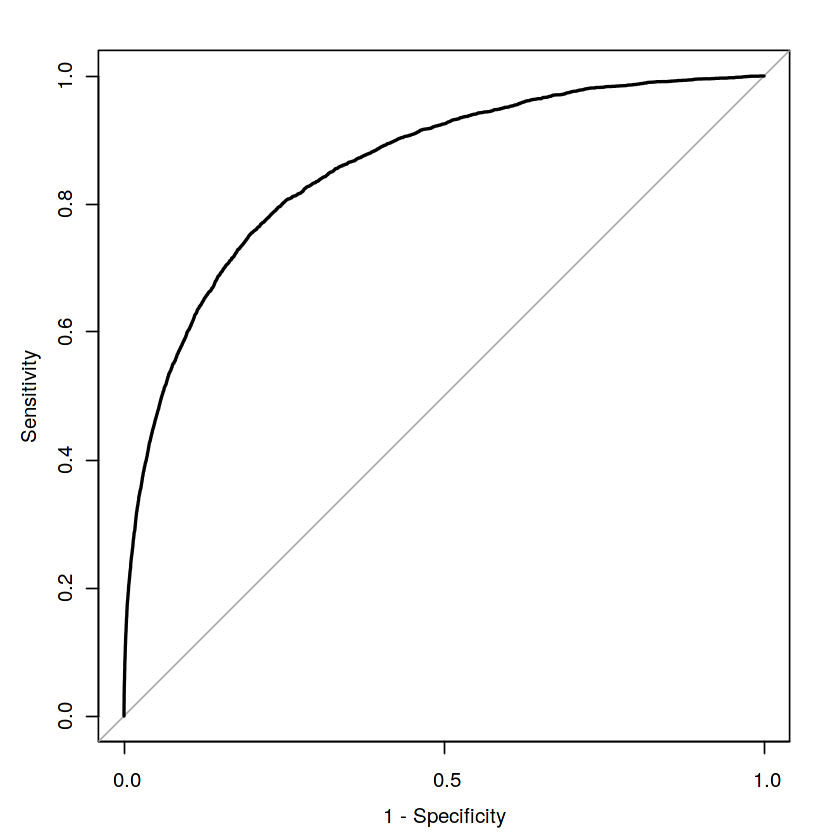

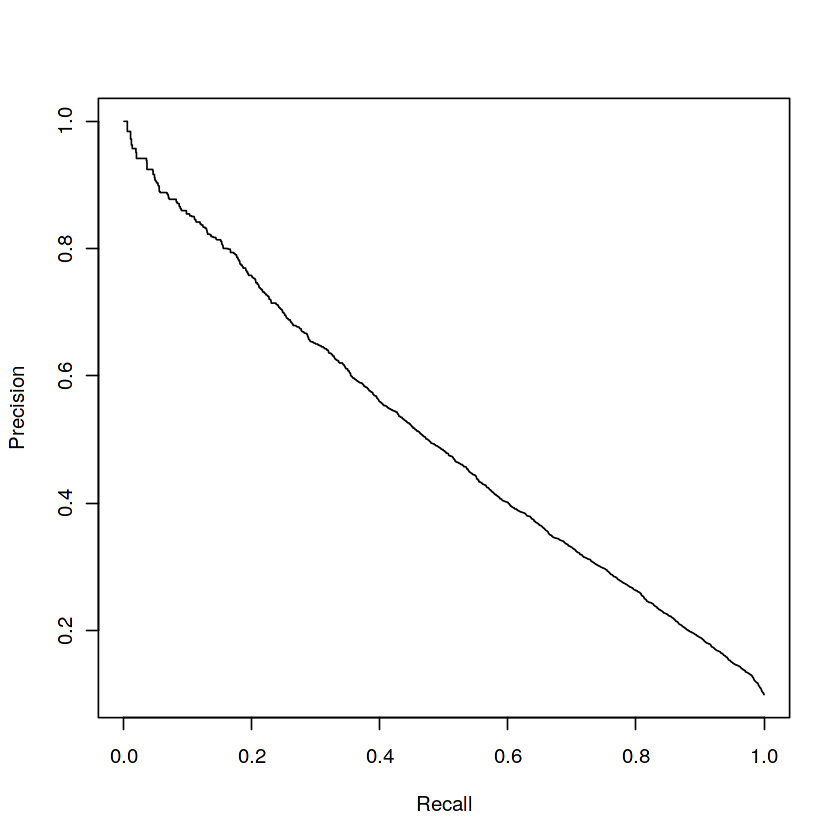

In [11]:
roc(y[,'target'],pred,plot=TRUE,legacy.axes=TRUE)
y_pred_num <- as.factor(y_pred_num)
confusionMatrix(data=y_pred_num, as.factor(y[,'target']))
PRcurve(pred,y[,'target'])

### Oversample the dataset

In [12]:
set.seed(699)
#### Oversample X & y
library('ROSE')
X_rose <- ROSE(target~., data =X[,],seed=32)$data
y_rose <- ROSE(target~., data =y[,],seed=42)$data

X_rose$target<-as.factor(X_rose$target)
y_rose$target <- as.factor(y_rose$target)


    0     1 
70036 69964 

In [13]:
rm("df_santander","X_train")
rm("y_train","X_test","y_test","X_train_rs","y_train_rs","X_test_rs","y_test_rs","x_pc","y_pc")
rm("train.index")
rm("X_index")

### Logistic Regression

In [ ]:
library(caret)

In [14]:
mod_fit <- train(target ~.,  data=X_rose, method="glm", family="binomial")

In [76]:
pred = predict(mod_fit, newdata=y_rose,type="raw")
y_pred_num <- ifelse(pred > 0.5, 1, 0)

In [77]:
library(pROC)
library(DMwR)

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = (y_rose[, "target"]), predictor = as.numeric(pred),     plot = TRUE, legacy.axes = TRUE)

Data: as.numeric(pred) in 29923 controls ((y_rose[, "target"]) 0) < 30077 cases ((y_rose[, "target"]) 1).
Area under the curve: 0.7097

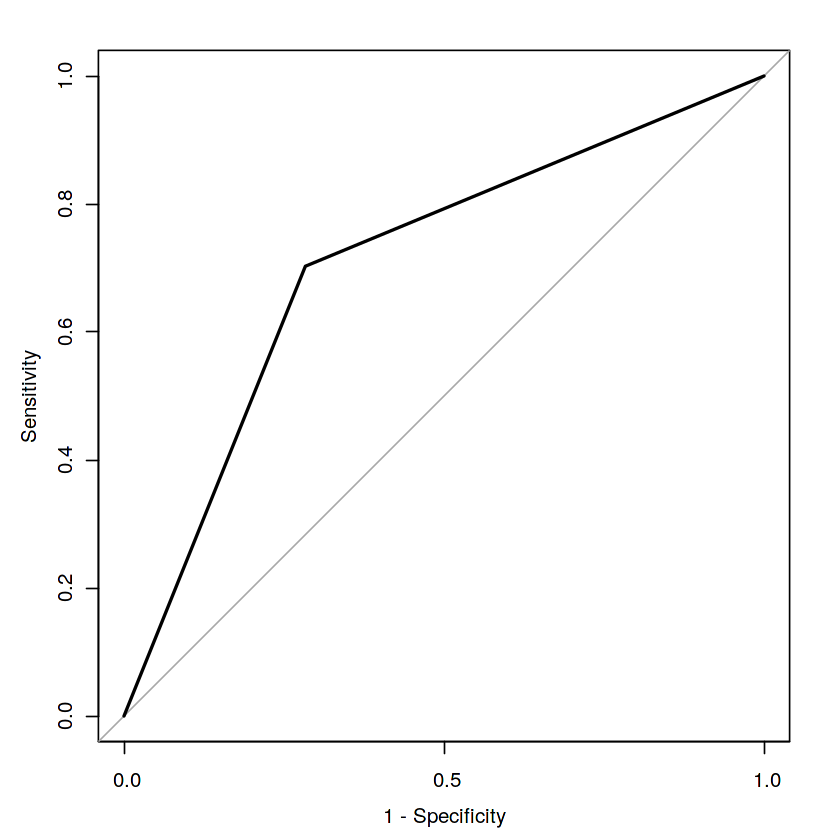

In [80]:
roc((y_rose[,'target']),as.numeric(pred),plot=TRUE,legacy.axes=TRUE)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 21443  8940
         1  8480 21137
                                         
               Accuracy : 0.7097         
                 95% CI : (0.706, 0.7133)
    No Information Rate : 0.5013         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.4194         
                                         
 Mcnemar's Test P-Value : 0.0005058      
                                         
            Sensitivity : 0.7166         
            Specificity : 0.7028         
         Pos Pred Value : 0.7058         
         Neg Pred Value : 0.7137         
             Prevalence : 0.4987         
         Detection Rate : 0.3574         
   Detection Prevalence : 0.5064         
      Balanced Accuracy : 0.7097         
                                         
       'Positive' Class : 0              
                                      

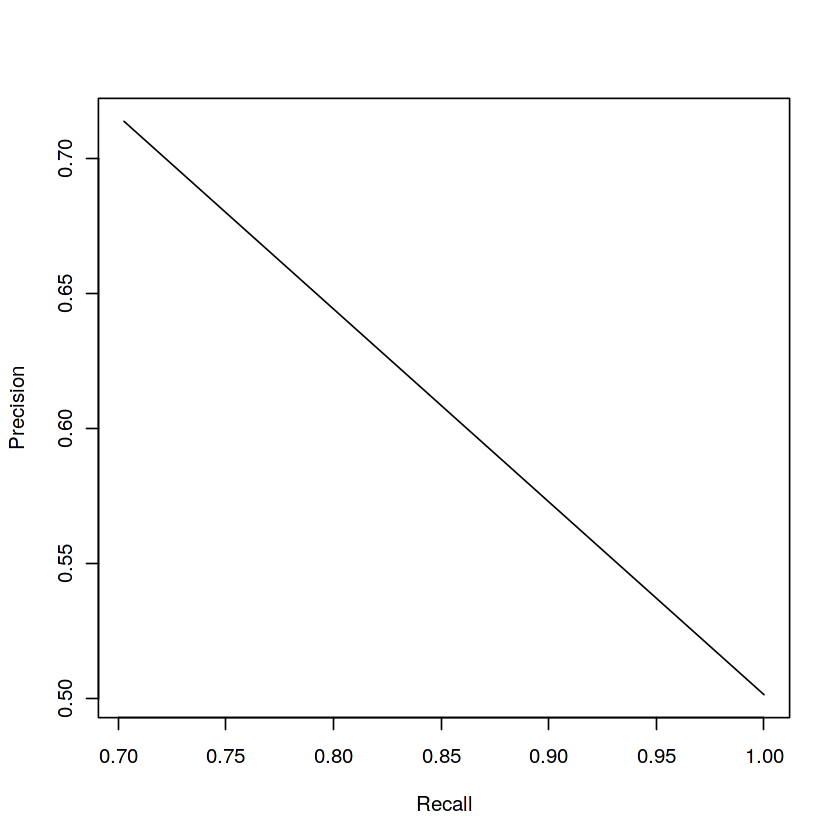

In [81]:
cm<-confusionMatrix(data=pred, as.factor(y_rose[,'target']))
cm
PRcurve(as.numeric(pred),(y_rose[,'target']))